# Cleaning & Exploring Text Features

In [2]:
import pandas as pd
import numpy as np
import spacy
import en_core_web_sm
import nltk
from nltk.corpus import stopwords

In [3]:
# !python -m spacy download en_core_web_trf

In [4]:
nlp = en_core_web_sm.load() # load the english package 
stop_words = set(stopwords.words("english"))

In [5]:
text_features = pd.read_csv("text_features.csv") # loading the the data
text_features # sanity check

,describe_discussion_employer,describe_discussion_coworker,describe_coworker_discussion_coworker,describe_discussion_previous_employer,describe_discussion_previous_coworker,describe_previous_coworker_discussion_coworker,PH_during_interview_why,MH_during_interview_why,describe_negative_reaction,describe_industry_AOI,other_comments
0,NaN,Spoke about my anxiety they were very supportive,"they spoke about their depression, i offered m...",NaN,NaN,NaN,NaN,I'd be worried they wouldn't hire me,NaN,They don't take it seriously,NaN
1,NaN,"the coworker was comprehensive, empathetic and...","a discussion about symptoms of depression, and...",NaN,understanding and supportive,NaN,it may require specific measures to accomodate...,mental health issues are stigmatised and misun...,"During a discussion about ""mental health first...","raise awareness, talk about it to lessen the s...",NaN
2,"The conversation went well, he too suffers men...",They all seemed understanding and some even ad...,NaN,NaN,The ones that I discussed it with were actuall...,NaN,I will sometimes bring up my psoriasis just as...,stigma,I was suffering depression and I was open abou...,"Education and awareness, statistics, add suppo...",NaN
3,Direct Manager and HR know because of medicati...,Coworkers that have become friends with me are...,NaN,NaN,NaN,NaN,Anything that may hurt my chances to be hired ...,Might hurt my chances,NaN,"More support, less burnout and death marches",NaN
4,NaN,NaN,NaN,NaN,I'm in mental heatlh so I talk about it often.,They talked about as caregivers of family member.,It depends. it's not something you start with ...,Don't think it's connected to the job. You do ...,NaN,I think tech is more internal and they don't r...,nope
...,...,...,...,...,...,...,...,...,...,...,...
1168,NaN,NaN,NaN,NaN,NaN,NaN,Embarrassing,I wouldn't want it to impact my chances of get...,NaN,Acknowledge its existence,We have lots of tech user groups across many d...
1169,NaN,NaN,NaN,Told about My depression -> got fired,Told about My depression got supportive reactions,Discussed how we could help other worker showi...,NaN,NaN,NaN,NaN,NaN
1170,NaN,NaN,NaN,NaN,I've brought up my depression with previous co...,Coworkers have brought up issues like depressi...,"If it mattered to the job, I'd bring it up imm...","Without knowing their stance, there's too much...",NaN,"Be more open, understand how to respond to peo...",NaN
1171,Supportive. They understood what I was going t...,Multiple conversations,This is too much to answer on mobile,NaN,NaN,Commiserated over terrible management that was...,Could interfere with job,Could interfere with job,NaN,Provide training or resources to educate or no...,Thanks


**Comment:** To see more details about these features have a look at the `Data Collection Notebook`.

In [6]:
# creating new dataframes for each feature 

df_1 = pd.DataFrame().assign(original_text = text_features['describe_discussion_employer'])
df_2 = pd.DataFrame().assign(original_text = text_features['describe_discussion_coworker'])
df_3 = pd.DataFrame().assign(original_text = text_features['describe_coworker_discussion_coworker'])
df_4 = pd.DataFrame().assign(original_text = text_features['describe_discussion_previous_employer'])
df_5 = pd.DataFrame().assign(original_text = text_features['describe_discussion_previous_coworker'])
df_6 = pd.DataFrame().assign(original_text = text_features['describe_previous_coworker_discussion_coworker'])
df_7 = pd.DataFrame().assign(original_text = text_features['PH_during_interview_why'])
df_8 = pd.DataFrame().assign(original_text = text_features['MH_during_interview_why'])
df_9 = pd.DataFrame().assign(original_text = text_features['describe_negative_reaction'])
df_10 = pd.DataFrame().assign(original_text = text_features['describe_industry_AOI']) 
df_11 = pd.DataFrame().assign(original_text = text_features['other_comments'])

## Cleaning Punctuation

In [7]:
df_1['clean_text'] = df_1['original_text'].str.replace(r'[^\w\s]+', '') 
df_1

C:\Users\lazar\AppData\Local\Temp\ipykernel_21764\1335087607.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_1['clean_text'] = df_1['original_text'].str.replace(r'[^\w\s]+', '')


,original_text,clean_text
0,NaN,NaN
1,NaN,NaN
2,"The conversation went well, he too suffers men...",The conversation went well he too suffers ment...
3,Direct Manager and HR know because of medicati...,Direct Manager and HR know because of medicati...
4,NaN,NaN
...,...,...
1168,NaN,NaN
1169,NaN,NaN
1170,NaN,NaN
1171,Supportive. They understood what I was going t...,Supportive They understood what I was going th...


In [8]:
df_1 = df_1.dropna()
df_1 = df_1.reset_index(drop=True) #resetting index
df_1

,original_text,clean_text
0,"The conversation went well, he too suffers men...",The conversation went well he too suffers ment...
1,Direct Manager and HR know because of medicati...,Direct Manager and HR know because of medicati...
2,I needed to discuss accommodations due to Auti...,I needed to discuss accommodations due to Auti...
3,Are you OK?\nYeup,Are you OK\nYeup
4,"""I suffer from extreme anxiety and ADD, and ta...",I suffer from extreme anxiety and ADD and take...
...,...,...
263,"talking about mental health, anxiety, meditati...",talking about mental health anxiety meditation...
264,I was hospitalized following a suicide attempt...,I was hospitalized following a suicide attempt...
265,Took some sick days after a break up. Direct m...,Took some sick days after a break up Direct ma...
266,no,no


In [9]:
df_1.info() # sanity check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   original_text  268 non-null    object
 1   clean_text     268 non-null    object
dtypes: object(2)
memory usage: 4.3+ KB


## Tokenization & Lemmatization

In [10]:
df_1['token_lemma'] = df_1['clean_text'].apply(lambda text: 
                                           " ".join(token.lemma_ for token in nlp(text) 
                                           if not token.is_stop))
df_1

,original_text,clean_text,token_lemma
0,"The conversation went well, he too suffers men...",The conversation went well he too suffers ment...,conversation go suffer mental illness fire hav...
1,Direct Manager and HR know because of medicati...,Direct Manager and HR know because of medicati...,Direct Manager hr know medication real reaction
2,I needed to discuss accommodations due to Auti...,I needed to discuss accommodations due to Auti...,need discuss accommodation Autism ADHD conve...
3,Are you OK?\nYeup,Are you OK\nYeup,ok \n yeup
4,"""I suffer from extreme anxiety and ADD, and ta...",I suffer from extreme anxiety and ADD and take...,suffer extreme anxiety add medication effect w...
...,...,...,...
263,"talking about mental health, anxiety, meditati...",talking about mental health anxiety meditation...,talk mental health anxiety meditation great de...
264,I was hospitalized following a suicide attempt...,I was hospitalized following a suicide attempt...,hospitalize follow suicide attempt tell boss n...
265,Took some sick days after a break up. Direct m...,Took some sick days after a break up Direct ma...,take sick day break direct manager say sick re...
266,no,no,


In [11]:
remove = ['ADV','PRON','CCONJ','PUNCT','PART','DET','ADP','SPACE', 'NUM', 'SYM']

df_1['token_lemma_advanced'] = df_1['token_lemma'].apply(lambda text: 
                                                       " ".join(token.lemma_ for token in nlp(text) 
                                                       if token.pos_ not in remove))
df_1

,original_text,clean_text,token_lemma,token_lemma_advanced
0,"The conversation went well, he too suffers men...",The conversation went well he too suffers ment...,conversation go suffer mental illness fire hav...,conversation go suffer mental illness fire hav...
1,Direct Manager and HR know because of medicati...,Direct Manager and HR know because of medicati...,Direct Manager hr know medication real reaction,Direct Manager hr know medication real reaction
2,I needed to discuss accommodations due to Auti...,I needed to discuss accommodations due to Auti...,need discuss accommodation Autism ADHD conve...,need discuss accommodation Autism ADHD convers...
3,Are you OK?\nYeup,Are you OK\nYeup,ok \n yeup,ok yeup
4,"""I suffer from extreme anxiety and ADD, and ta...",I suffer from extreme anxiety and ADD and take...,suffer extreme anxiety add medication effect w...,suffer extreme anxiety add medication effect w...
...,...,...,...,...
263,"talking about mental health, anxiety, meditati...",talking about mental health anxiety meditation...,talk mental health anxiety meditation great de...,talk mental health anxiety meditation great de...
264,I was hospitalized following a suicide attempt...,I was hospitalized following a suicide attempt...,hospitalize follow suicide attempt tell boss n...,hospitalize follow suicide attempt tell boss n...
265,Took some sick days after a break up. Direct m...,Took some sick days after a break up Direct ma...,take sick day break direct manager say sick re...,take sick day break direct manager say sick re...
266,no,no,,


In [27]:
from nltk import FreqDist
import seaborn as sns
import matplotlib.pyplot as plt

def freq_words(x, terms=30): 
    '''Display the most frequent terms of the a given corpus'''
    all_words = ' '.join([text for text in x]) 
    all_words = all_words.split() 
  
    fdist = FreqDist(all_words) 
    words_df = pd.DataFrame({'word':list(fdist.keys()),   
                             'count':list(fdist.values())})
    
    # selecting top n most frequent words 
    d = words_df.nlargest(columns="count", n=terms)      
    plt.figure(figsize=(20,10)) 
    ax = sns.barplot(data=d, x="word", y="count", palette='deep') 
    ax.set(ylabel='Count')
    plt.xticks(rotation=90)
    plt.show()

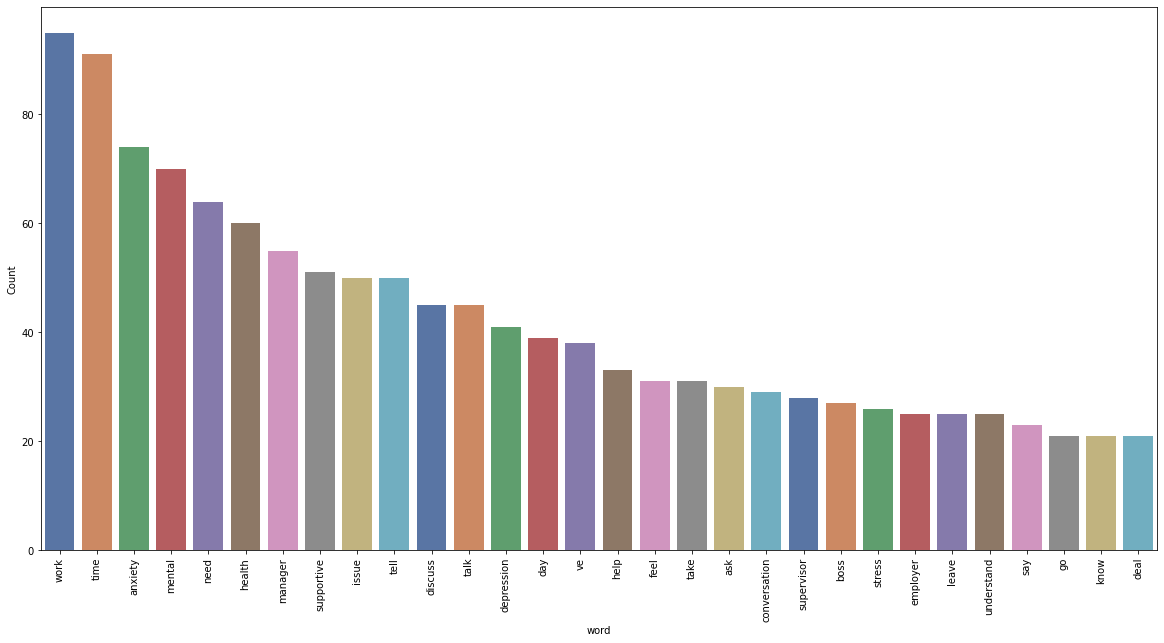

In [28]:
freq_words(df_1['token_lemma_advanced'], terms=30) # visualization to represent the most frequent terms

## Wordclouds

In [15]:
import wordcloud
import matplotlib.pyplot as plt

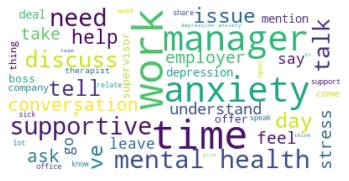

In [57]:
#for plotting images & adjusting colors
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image


#filter the df to one candidate, and create a list of responses from them
text = df_1['token_lemma_advanced'].tolist() 

# join the list and lowercase all the words
text = ' '.join(text).lower()

#create the wordcloud object
wordcloud = WordCloud(background_color="white",
                      #stopwords = STOPWORDS,
                      max_font_size=50,
                      max_words=50,
                      #mode = 'RGBA',
                      #contour_width=3, - relative to masks
                      #contour_color='firebrick',
                      collocations=True).generate(text)

#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear') # make the displayed image appear more smoothly
plt.axis('off')
plt.show()

## Pipeline for all text features

In [83]:
def wordcloud_from_features(df_x):
    # cleaning punctuation
    df_x['clean_text'] = df_x['original_text'].str.replace(r'[^\w\s]+', '')  
    
    # dropping nans    
    df_x = df_x.dropna()
    
    #resetting index
    df_x = df_x.reset_index(drop=True) 
    
    #creating tokens
    df_x['token_lemma'] = df_x['clean_text'].apply(lambda text: 
                                           " ".join(token.lemma_ for token in nlp(text) 
                                           if not token.is_stop))
    
    #lemmatizing
    remove = ['ADV','PRON','CCONJ','PUNCT','PART','DET','ADP','SPACE', 'NUM', 'SYM']
    
    df_x['token_lemma_advanced'] = df_x['token_lemma'].apply(lambda text: 
                                                       " ".join(token.lemma_ for token in nlp(text) 
                                                       if token.pos_ not in remove)) 
    
    #filter the df to one candidate, and create a list of responses from them
    text = df_x['token_lemma_advanced'].tolist() 
    
    # join the list and lowercase all the words
    text = ' '.join(text).lower()
    
    # creating stopword list
    stopwords = set(STOPWORDS)
    # updating stopwords after examining the 
    stopwords.update(["discuss", "conversation", "reaction", "people", "ve", "talk", "tell", "day", "work", 
                      "thing", "coworker", "mental", "health", "manager", "employee"])

    # creating the wordcloud object
    wordcloud = WordCloud(background_color="white",
                          stopwords = stopwords,
                          max_font_size=50,
                          max_words=50,
                          #mode = 'RGBA',
                          #contour_width=3, - relative to masks
                          #contour_color='firebrick',
                          collocations=True).generate(text)

    # plotting the wordcloud object
    plt.imshow(wordcloud, interpolation='bilInear')
    plt.axis('off')
    return plt.show()

**Question 1: Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions**

C:\Users\lazar\AppData\Local\Temp\ipykernel_18440\3598859323.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_x['clean_text'] = df_x['original_text'].str.replace(r'[^\w\s]+', '')


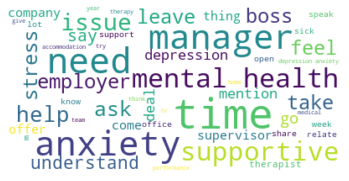

In [66]:
wordcloud_from_features(df_1)

**Question 2: Describe the conversation with coworkers you had about your mental health including their reactions.**

C:\Users\lazar\AppData\Local\Temp\ipykernel_18440\3805370589.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_x['clean_text'] = df_x['original_text'].str.replace(r'[^\w\s]+', '')


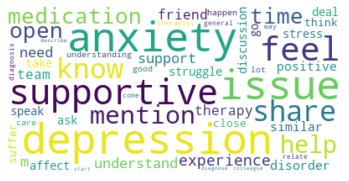

In [81]:
wordcloud_from_features(df_2)

**Question 3: Describe the conversation your coworker had with you about their mental health (please do not use names).**

C:\Users\lazar\AppData\Local\Temp\ipykernel_18440\3846176422.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_x['clean_text'] = df_x['original_text'].str.replace(r'[^\w\s]+', '')


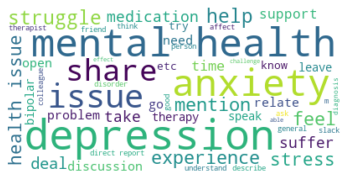

In [79]:
wordcloud_from_features(df_3)

**Question 4: Describe the conversation you had with your previous employer about your mental health, including their reactions and actions taken to address your mental health issue/questions.**

C:\Users\lazar\AppData\Local\Temp\ipykernel_18440\3598859323.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_x['clean_text'] = df_x['original_text'].str.replace(r'[^\w\s]+', '')


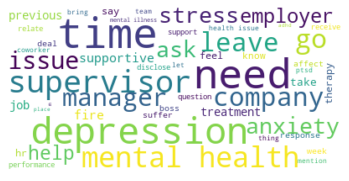

In [69]:
wordcloud_from_features(df_4)

**Question 5: Describe the conversation you had with your previous coworkers about your mental health including their reactions.**

C:\Users\lazar\AppData\Local\Temp\ipykernel_18440\3598859323.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_x['clean_text'] = df_x['original_text'].str.replace(r'[^\w\s]+', '')


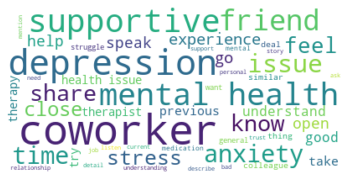

In [70]:
wordcloud_from_features(df_5)

**Question 6: Describe the conversation your coworker had with you about their mental health (please do not use names).**

C:\Users\lazar\AppData\Local\Temp\ipykernel_18440\1307403121.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_x['clean_text'] = df_x['original_text'].str.replace(r'[^\w\s]+', '')


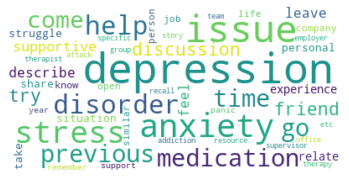

In [84]:
wordcloud_from_features(df_6)

**Question 7: Would you be willing to bring up a physical health issue with a potential employer in an interview? Why or why not?**

C:\Users\lazar\AppData\Local\Temp\ipykernel_18440\3598859323.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_x['clean_text'] = df_x['original_text'].str.replace(r'[^\w\s]+', '')


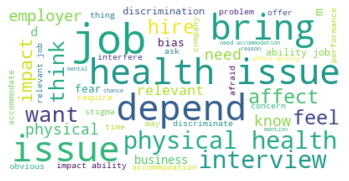

In [72]:
wordcloud_from_features(df_7)

**Question 8: Would you be willing to bring up a mental health issue with a potential employer in an interview? Why or why not?**

C:\Users\lazar\AppData\Local\Temp\ipykernel_18440\3598859323.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_x['clean_text'] = df_x['original_text'].str.replace(r'[^\w\s]+', '')


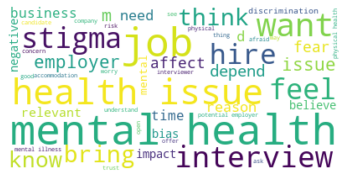

In [73]:
wordcloud_from_features(df_8)

**Question 9: Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace? Describe the circumstances of the badly handled or unsupportive response.**

C:\Users\lazar\AppData\Local\Temp\ipykernel_18440\3598859323.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_x['clean_text'] = df_x['original_text'].str.replace(r'[^\w\s]+', '')


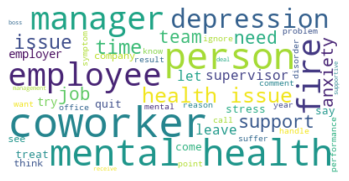

In [74]:
wordcloud_from_features(df_9)

**Question 10: Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.**

C:\Users\lazar\AppData\Local\Temp\ipykernel_18440\3805370589.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_x['clean_text'] = df_x['original_text'].str.replace(r'[^\w\s]+', '')


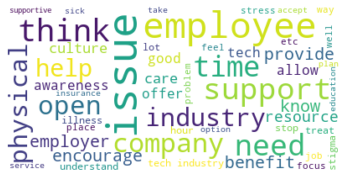

In [82]:
wordcloud_from_features(df_10)

**Question 11: If there is anything else you would like to tell us that has not been covered by the survey questions, please use this space to do so.**

C:\Users\lazar\AppData\Local\Temp\ipykernel_18440\3598859323.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_x['clean_text'] = df_x['original_text'].str.replace(r'[^\w\s]+', '')


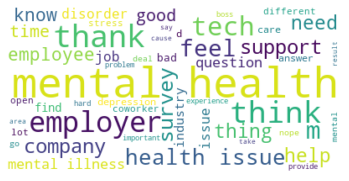

In [76]:
wordcloud_from_features(df_11)